<a href="https://colab.research.google.com/github/theevildoof/TinyML_OV7670/blob/main/TinyML_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np                   # advanced math library
import matplotlib.pyplot as plt      # MATLAB like plotting routines
import random                        # for generating random numbers

from keras.datasets import mnist     # MNIST dataset is included in Keras
from keras.models import Sequential  # Model type to be used

from keras.layers.core import Dense, Dropout, Activation # Types of layers to be used in our model
from keras.utils import np_utils                         # NumPy related tools
import tensorflow as tf

tf.config.run_functions_eagerly(True)

In [ ]:
# The MNIST data is split between 60,000 28 x 28 pixel training images and 10,000 28 x 28 pixel images
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


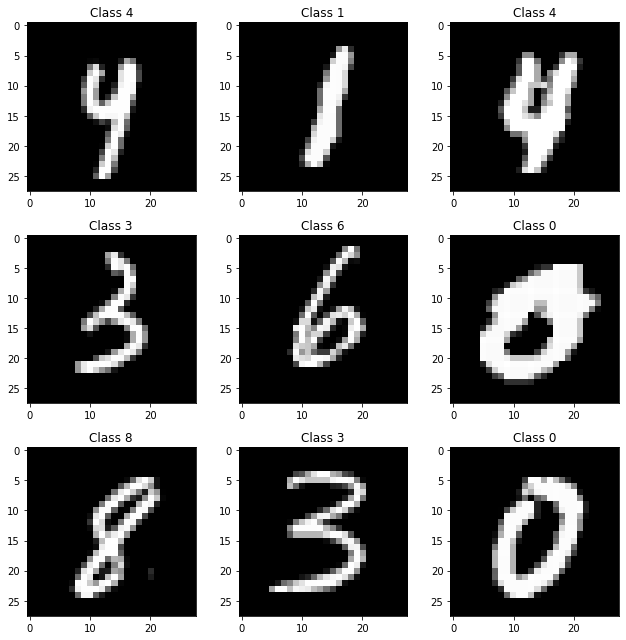

In [ ]:
plt.rcParams['figure.figsize'] = (9,9) # Make the figures a bit bigger

for i in range(9):
    plt.subplot(3,3,i+1)
    num = random.randint(0, len(X_train))
    plt.imshow(X_train[num], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[num]))
    
plt.tight_layout()

In [ ]:
# just a little function for pretty printing a matrix
def matprint(mat, fmt="g"):
    col_maxes = [max([len(("{:"+fmt+"}").format(x)) for x in col]) for col in mat.T]
    for x in mat:
        for i, y in enumerate(x):
            print(("{:"+str(col_maxes[i])+fmt+"}").format(y), end=",")
        print("")

# now print!        
matprint(X_train[num])


0,0,0,0,0,0,0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 0,0,0,0,0,0,
0,0,0,0,0,0,0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 0,0,0,0,0,0,
0,0,0,0,0,0,0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 0,0,0,0,0,0,
0,0,0,0,0,0,0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 0,0,0,0,0,0,
0,0,0,0,0,0,0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 0,0,0,0,0,0,
0,0,0,0,0,0,0,  0,  0,  0,  0,  0, 63,255,253,170,253,192,109, 31,  0,  0, 0,0,0,0,0,0,
0,0,0,0,0,0,0,  0,  0,  0,  0,  0,144,211,252,252,252,253,252,227,134,  0, 0,0,0,0,0,0,
0,0,0,0,0,0,0,  0,  0,  0,  0, 27,221,176,247,252,252,253,252,252,252, 21, 0,0,0,0,0,0,
0,0,0,0,0,0,0,  0,  0,  0,  0, 16,108,  1, 93,128,252,253,252,252,252,144, 1,0,0,0,0,0,
0,0,0,0,0,0,0,  0,  0,  0, 32,211,252,253, 35,  0,  0,109,252,252,252,253,35,0,0,0,0,0,
0,0,0,0,0,0,0,  0,  1, 73,207,252,252,253, 35,  0,  0, 78,242,252,252,253,35,0,0,0,0,0,
0,0,0,0,0,0,0,  0,  1,252,252,25

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, Flatten
from keras.layers import BatchNormalization

In [ ]:
# Again, do some formatting
# Except we do not flatten each image into a 784-length vector because we want to perform convolutions first

X_train = X_train.reshape(60000, 28, 28, 1) #add an additional dimension to represent the single-channel
X_test = X_test.reshape(10000, 28, 28, 1)

X_train = X_train.astype('float32')         # change integers to 32-bit floating point numbers
X_test = X_test.astype('float32')

#X_train /= 255                              # normalize each value for each pixel for the entire vector for each input
#X_test /= 255

print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 28, 28, 1)
Testing matrix shape (10000, 28, 28, 1)


In [ ]:
# one-hot format classes

nb_classes = 10 # number of unique digits

Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [ ]:
from keras.layers.convolutional import DepthwiseConv2D
from keras.backend import relu
from keras.activations import softmax
model = Sequential()                                 # Linear stacking of layers

model.add(DepthwiseConv2D((3,3),input_shape=(28,28,1)))
# Convolution Layer 1
model.add(Conv2D(2, (3, 3)))      # 2 different 3x3 kernels -- so 2 feature maps
model.add(BatchNormalization(axis=-1))               # normalize each feature map before activation
convLayer01 = Activation('relu')                     # activation
model.add(convLayer01)

# Convolution Layer 2
model.add(Conv2D(2, (3, 3)))                        # 2 different 3x3 kernels -- so 2 feature maps
model.add(BatchNormalization(axis=-1))               # normalize each feature map before activation
model.add(Activation('relu'))                        # activation
convLayer02 = MaxPooling2D(pool_size=(2,2))          # Pool the max values over a 2x2 kernel
model.add(convLayer02)

# Convolution Layer 3
model.add(Conv2D(4,(3, 3)))                         # 4 different 3x3 kernels -- so 4 feature maps
model.add(BatchNormalization(axis=-1))               # normalize each feature map before activation
convLayer03 = Activation('relu')                     # activation
model.add(convLayer03)

# Convolution Layer 4
model.add(Conv2D(4, (3, 3)))                        # 4 different 3x3 kernels -- so 64 feature maps
model.add(BatchNormalization(axis=-1))               # normalize each feature map before activation
model.add(Activation('relu'))                        # activation
convLayer04 = MaxPooling2D(pool_size=(2,2))          # Pool the max values over a 2x2 kernel
model.add(convLayer04)

model.add(Flatten())                                 
model.add(Dense(5,activation = relu))                           
model.add(Dense(10, activation = softmax))                        

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 depthwise_conv2d_4 (Depthwi  (None, 26, 26, 1)        10        
 seConv2D)                                                       
                                                                 
 conv2d_19 (Conv2D)          (None, 24, 24, 2)         20        
                                                                 
 batch_normalization_19 (Bat  (None, 24, 24, 2)        8         
 chNormalization)                                                
                                                                 
 activation_19 (Activation)  (None, 24, 24, 2)         0         
                                                                 
 conv2d_20 (Conv2D)          (None, 22, 22, 2)         38        
                                                                 
 batch_normalization_20 (Bat  (None, 22, 22, 2)       

In [ ]:

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train,Y_train, steps_per_epoch=60000//128, epochs=3, verbose=1, 
                    validation_data=(X_test,Y_test))

Epoch 1/3


/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


468/468 [==============================] - 76s 161ms/step - loss: 1.4928 - accuracy: 0.4843 - val_loss: 0.8643 - val_accuracy: 0.7379
Epoch 2/3
468/468 [==============================] - 77s 165ms/step - loss: 0.6703 - accuracy: 0.7933 - val_loss: 0.5185 - val_accuracy: 0.8402
Epoch 3/3
461/468 [============================>.] - ETA: 0s - loss: 0.4774 - accuracy: 0.8524WARNING:tensorflow:Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches (in this case, 1404 batches). You may need to use the repeat() function when building your dataset.


468/468 [==============================] - 75s 161ms/step - loss: 0.4775 - accuracy: 0.8524 - val_loss: 0.3994 - val_accuracy: 0.8731


In [ ]:
score = model.evaluate(X_test, Y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

  5/313 [..............................] - ETA: 8s - loss: 0.3009 - accuracy: 0.9250

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


313/313 [==============================] - 8s 27ms/step - loss: 0.3994 - accuracy: 0.8731
Test score: 0.3994104266166687
Test accuracy: 0.8730999827384949


In [ ]:
!apt-get -qq install xxd
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model to disk
open("gesture_model.tflite", "wb").write(tflite_model)
  
import os
basic_model_size = os.path.getsize("gesture_model.tflite")
print("Model is %d bytes" % basic_model_size)

INFO:tensorflow:Assets written to: /tmp/tmp3ygawltn/assets


INFO:tensorflow:Assets written to: /tmp/tmp3ygawltn/assets


Model is 7624 bytes


In [ ]:
!echo "const unsigned char model[] = {" > /content/model.h
!cat gesture_model.tflite | xxd -i      >> /content/model.h
!echo "};"                              >> /content/model.h

import os
model_h_size = os.path.getsize("model.h")
print(f"Header file, model.h, is {model_h_size:,} bytes.")
print("\nOpen the side panel (refresh if needed). Double click model.h to download the file.")

Header file, model.h, is 47,050 bytes.

Open the side panel (refresh if needed). Double click model.h to download the file.
